DATA CLEANSING

In [160]:
import pandas as pd
df = pd.read_csv('NYC TLC Trip Record.csv')
df

C:\Users\ABI\AppData\Local\Temp\ipykernel_27228\3455876331.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [161]:
# PERHITUNGAN IQR (INTERQUARTILE RANGE)

Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# FILTER 1 - OUTLIER

df_outlier = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]

print("JUMLAH DATA AWAL:", df.shape)
print("SETELAH FARE_AMOUNT DIBERSIHKAN:", df_outlier.shape)

df_outlier.to_csv('df_outlier.csv', index=False)

JUMLAH DATA AWAL: (68211, 20)
SETELAH FARE_AMOUNT DIBERSIHKAN: (63872, 20)


In [162]:
df2 = pd.read_csv('df_outlier.csv')
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63867,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
63868,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
63869,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
63870,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [163]:
# FILTER 2 - DUPLICATE

df_duplicate = df2.drop_duplicates(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], keep='first')
df_duplicate.to_csv('df_duplicate.csv', index=False)

print("JUMLAH DATA AWAL:", df2.shape)
print("SETELAH FARE_AMOUNT DIBERSIHKAN:", df_duplicate.shape)

JUMLAH DATA AWAL: (63872, 20)
SETELAH FARE_AMOUNT DIBERSIHKAN: (63726, 20)


In [164]:
df3 = pd.read_csv('df_duplicate.csv')
df3

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63721,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
63722,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
63723,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
63724,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [165]:
# FILTER 3 - MISSING VALUE

# DELETE EHAIL_FEE KARENA NULL SEMUA
df_missing = df3.drop(columns=['ehail_fee'])

# DELETE SEMUA ROW YANG ADA NULL
df_missing = df_missing.dropna()

df_missing.to_csv('df_missing.csv', index=False)

print("JUMLAH DATA AWAL:", df3.shape)
print("SETELAH FARE_AMOUNT DIBERSIHKAN:", df_missing.shape)

JUMLAH DATA AWAL: (63726, 20)
SETELAH FARE_AMOUNT DIBERSIHKAN: (60093, 19)


In [166]:
df4 = pd.read_csv('df_missing.csv')
df4

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60088,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
60089,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
60090,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
60091,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


DATA CORRELATION

In [167]:
# PERHITUNGAN MATRIX KORELASI

correlation_matrix = df4.corr(numeric_only=True)

top_positive = correlation_matrix.abs().unstack().sort_values(ascending=False)
top_positive = top_positive[top_positive < 1].drop_duplicates()

In [168]:
# LIMA KORELASI POSITIF

top_positive = top_positive.head(5)

top_positive_df = top_positive.reset_index()
top_positive_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

top_positive_df['Correlation'] = (top_positive_df['Correlation'] * 100).round(2)

print(top_positive_df)

     Variable 1    Variable 2  Correlation
0      VendorID       mta_tax        96.14
1     trip_type    RatecodeID        94.09
2   fare_amount  total_amount        92.57
3  total_amount    tip_amount        57.26
4  payment_type    tip_amount        54.00


In [169]:
# LIMA KORELASI NEGATIF

correlations = correlation_matrix.unstack()
correlations = correlations[correlations.index.get_level_values(0) != correlations.index.get_level_values(1)]
correlations = correlations.drop_duplicates()

top_negative = correlations.sort_values().head(5)

top_negative_df = top_negative.reset_index()
top_negative_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

top_negative_df['Correlation'] = (top_negative_df['Correlation'] * 100).round(2)

print(top_negative_df)

     Variable 1    Variable 2  Correlation
0      VendorID       mta_tax       -96.14
1    tip_amount  payment_type       -54.00
2  total_amount  payment_type       -28.36
3    RatecodeID       mta_tax       -23.49
4       mta_tax     trip_type       -22.98


VISUALISASI

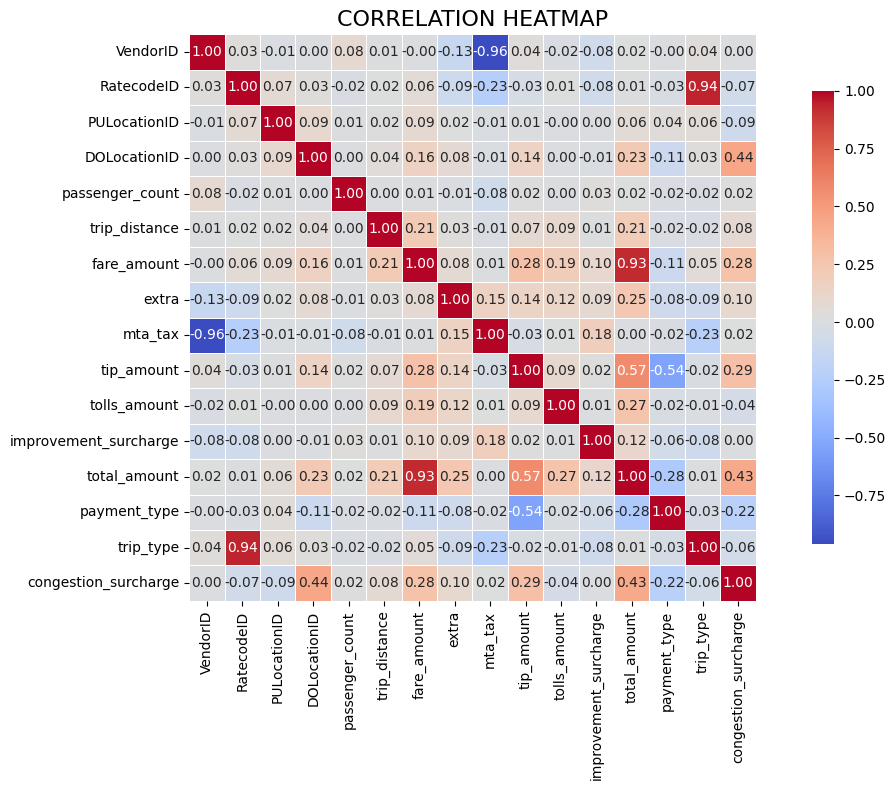

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# PEMBUATAN HEATMAP
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("CORRELATION HEATMAP", fontsize=16)

plt.tight_layout()
plt.show()


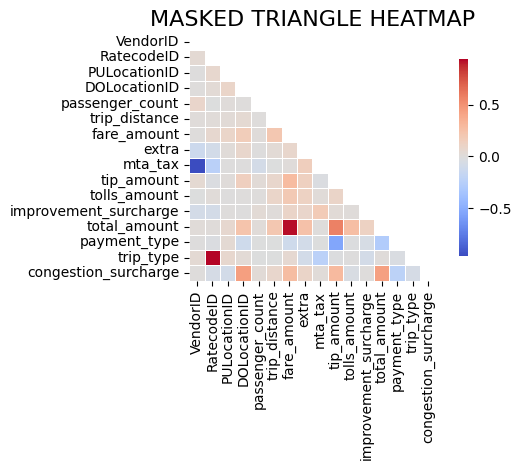

In [171]:
import numpy as np

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot=False
)

plt.title("MASKED TRIANGLE HEATMAP", fontsize=16)
plt.tight_layout()
plt.show()

TABLEAU PREPARATION

In [172]:
# SAVE UNTUK TABLEAU

# GABUNG JADI SATU DATAFRAME
top_correlations = pd.concat([top_positive_df, top_negative_df], ignore_index=True)

# HAPUS BARIS YANG DOUBLE POSITIF & NEGATIF
top_correlations = top_correlations[
    ~top_correlations['Variable 1'].str.contains('VendorID')
]
top_correlations = top_correlations[
    ~top_correlations['Variable 1'].str.contains('payment_type')
]

# Simpan ke satu file CSV
top_correlations.to_csv('top_correlations.csv', index=False)

ANALYSIS

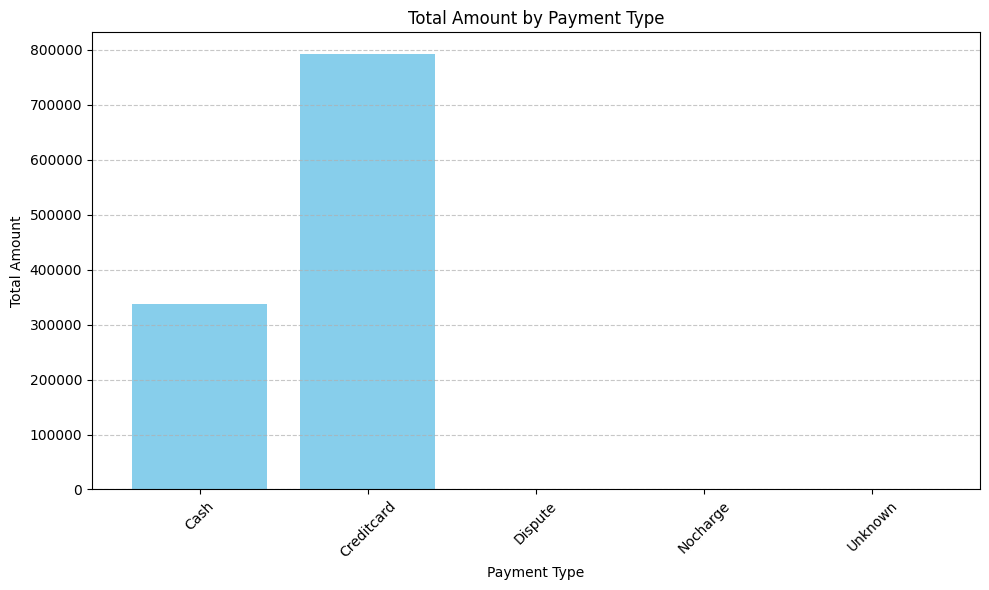

In [173]:
# TOTAL_AMOUNT vs PAYMENT_TYPE, sum total amount based on jenis payment

df5 = pd.read_csv("df_missing.csv")

payment_type_mapping = {
    1: "Creditcard",
    2: "Cash",
    3: "Nocharge",
    4: "Dispute",
    5: "Unknown",
    6: "Voidedtrip"
}

df5['payment_type'] = df5['payment_type'].map(payment_type_mapping)

total_amount_by_payment_type = df5.groupby('payment_type', as_index=False)['total_amount'].sum()

output_path = "total_amount_by_payment_type.csv"
total_amount_by_payment_type.to_csv(output_path, index=False)

# VISUALISASI

df6 = pd.read_csv("total_amount_by_payment_type.csv")

plt.figure(figsize=(10, 6))
plt.bar(df6['payment_type'], df6['total_amount'], color='skyblue')
plt.title('Total Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

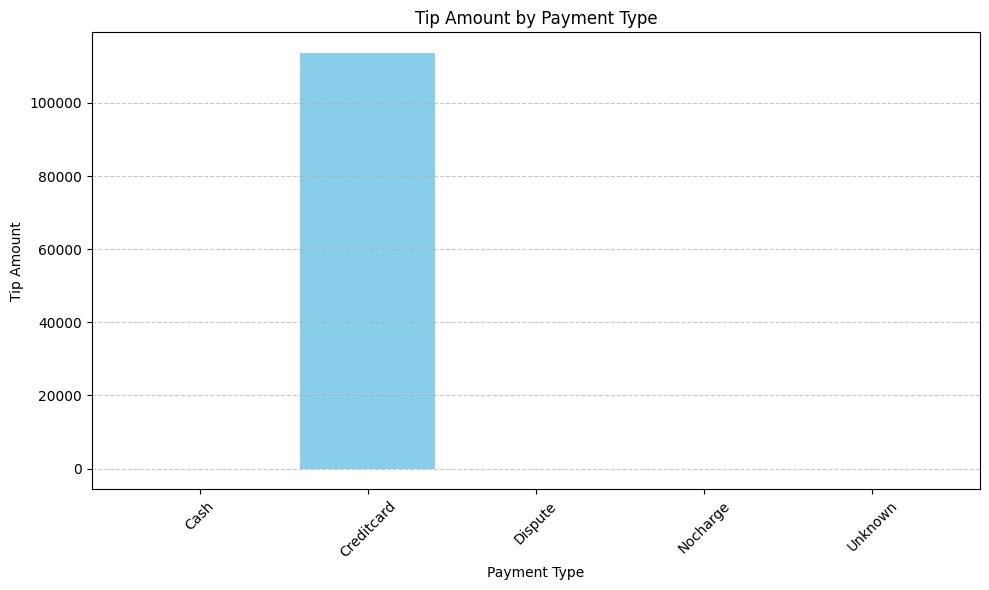

In [174]:
# TIP_AMOUNT vs PAYMENT_TYPE, sum tip based on jenis payment

df5 = pd.read_csv("df_missing.csv")

payment_type_mapping = {
    1: "Creditcard",
    2: "Cash",
    3: "Nocharge",
    4: "Dispute",
    5: "Unknown",
    6: "Voidedtrip"
}

df5['payment_type'] = df5['payment_type'].map(payment_type_mapping)

tip_amount_by_payment_type = df5.groupby('payment_type', as_index=False)['tip_amount'].sum()

output_path = "tip_amount_by_payment_type.csv"
tip_amount_by_payment_type.to_csv(output_path, index=False)

# VISUALISASI

df7 = pd.read_csv("tip_amount_by_payment_type.csv")

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df7['payment_type'], df7['tip_amount'], color='skyblue')
plt.title('Tip Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Tip Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()